In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(74)


"""
source: https://medium.com/@ruthpolleitriechert/what-does-genre-in-art-mean-things-you-never-dared-to-ask-a-gallerist-d29b5f3e9dba
History Painting
Portraits
Genre Painting
Landscapes
Animal Painting
Still Life

vs. 

source: [https://www.lumas.com/art-genres/]
Renaissance
Rococo
Romanticism 
Expressionism
Impressionism
Surrealism
Abstract art
Bauhaus Art
Pop art
Realist Art
"""
# class Interests:
#     def __init__(self):
#         self.abstract = random.random()
#         self.realist = random.random()
#         self.romanticism = random.random()
#         self.surrealism = random.random()
  
def interestsGenerator():
        interestsVector = np.random.rand(4)
        # interestsVector[0]  #abstract
        # interestsVector[1]  #realist
        # interestsVector[2]  #romanticism
        # interestsVector[3]  #surrealism
        #normalize:
        interestsVector = interestsVector/np.linalg.norm(interestsVector)
        # print("norm is:", np.linalg.norm(interestsVector))
        return interestsVector

def printInfo(p):
        string = f"*****\nPersonInfo: \nID: {p.id}\nInterests: {p.interests}\nTimeSpent: {p.timeSpent}\n*****\n"
        print(string)

class Person:
    def get_interests(self):
        return self.interests
    
    def get_x(self):
        return self.posX
    def get_y(self):
        return self.posY
    def get_loc(self):
        return (self.posX, self.posY)
    def set_loc(self, newX, newY):
        self.posX = newX
        self.posY = newY
        
        
    def __init__(self):
        self.id = id(self)
        self.timeSpent = 0
        self.interests = interestsGenerator() #Interests()
        self.posX = -1 #-1 is outside the sim
        self.posY = -1 #-1 is outside the sim
        self.visited = [] #list of visited exhibits
        print(f"Person with ID {self.id} generated! Interests: {self.interests}")
        # printInfo(self)
    
p = Person()
p2 = Person()
p3 = Person()

class Exhibit:
    def __init__(self, loc, num):
        self.genres = interestsGenerator()
        (self.posX, self.posY) = loc
        self.num = num
    def get_genres(self):
        return self.genres
    
    def get_x(self):
        return self.posX
    def get_y(self):
        return self.posY
    def get_loc(self):
        return (self.posX, self.posY)
    def set_loc(self, newX, newY):
        self.posX = newX
        self.posY = newY

def dist(loc1, loc2): #loc1: (x, y) --> calcualtes the Euclidian distance btw 2 points
    return np.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
## Testing
# e1 = Exhibit()
# print(p.get_interests() @ e1.get_genres())
# print(p2.get_interests() @ e1.get_genres())
# p3.get_interests() @ e1.get_genres()

Person with ID 140682853717472 generated! Interests: [0.16488274 0.63974722 0.7017118  0.26671657]
Person with ID 140682856758576 generated! Interests: [0.19286496 0.62802566 0.55290648 0.51252444]
Person with ID 140682881362864 generated! Interests: [0.57984717 0.09214083 0.71000283 0.38882297]


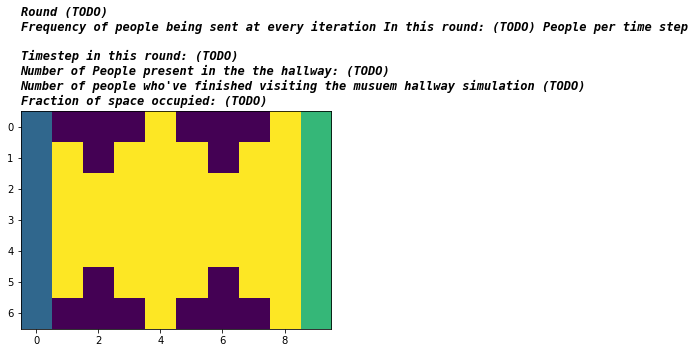

In [2]:
## Creating the board
board_dim = (7, 10)
board = np.zeros(board_dim)
board[:, -1] = -1
board[:, 0] = -2
## Exhibit 1:
board[0,1:4] = -3
board[1,2] = -3
## Exhibit 2:
board[0,5:8] = -3
board[1,6] = -3
## Exhibit 3:
board[-1,1:4] = -3
board[-2,2] = -3
## Exhibit 4:
board[-1,5:8] = -3
board[-2,6] = -3


ex0c = (0,2)
ex1c = (0,6)
ex2c = (6, 2)
ex3c = (6, 6)
## Making the exhibits ex0 to ex3:
ex0 = Exhibit(ex0c, 0)
ex1 = Exhibit(ex1c, 1)
ex2 = Exhibit(ex2c, 2)
ex3 = Exhibit(ex3c, 3)
exhibits_lst = [ex0,ex1,ex2,ex3]

plt.imshow(board)
title_text = "Round (TODO)" + \
"\nFrequency of people being sent at every iteration In this round: (TODO) People per time step" + \
"\n" + \
"\nTimestep in this round: (TODO)" + \
"\nNumber of People present in the the hallway: (TODO)" + \
"\nNumber of people who've finished visiting the musuem hallway simulation (TODO)" + \
"\nFraction of space occupied: (TODO)" 
plt.title(title_text,fontsize='large',
    loc='left',
    fontweight='bold',
    style='italic',
    family='monospace')
plt.show()
# plt.subtitle("Frequency of sending people []. \n hi")
board_org = board.copy()

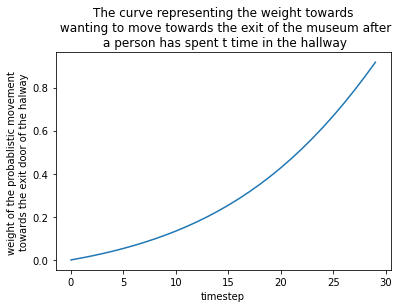

<Figure size 432x288 with 0 Axes>

In [3]:
L = 4
b = 40
k = 0.09 
t = np.arange(0,30)
y = L/(1+b*np.exp(-k*t)) - L/(1+b)
plt.clf()
plt.plot(t, y)
plt.xlabel("timestep")
plt.ylabel("weight of the probablistic movement \ntowards the exit door of the halway")
plt.title("The curve representing the weight towards\n wanting to move towards the exit of the museum after\n a person has spent t time in the hallway")
plt.show()
plt.savefig("Exiting weight progression.jpeg")

def calc_exit_pref(t): #t is time spent in the hallway
    return L/(1+b*np.exp(-k*t)) - L/(1+b)
    

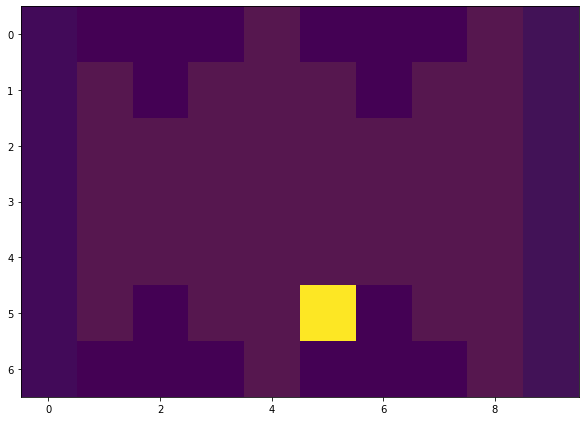

In [4]:
# @@ Cell 4 (RECOVERED):
#testing
# %matplotlib inline
# %matplotlib osx
plt_1 = plt.figure(figsize=(10, 10))
board2 = np.zeros(board_org.shape)
board2[5,5] = 10
plt.clf()
plt.imshow(board2)
plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
# title_text = title_generator(1,2,3,4,5,6)
# plt.suptitle(title_text,fontsize='large',
#         wrap=True,
# #         loc='left',
#         fontweight='bold',
#         style='italic',
#         family='monospace')
plt.show()
# plt.savefig("./images/im-1.jpeg")

In [5]:
# @@ Cell 5 (RECOVERED):
people_placements = np.zeros(board_dim) # 1 or 0 based on whether occupied or not --> #sunsetting this
people_present_lst = []
people_done_lst = [] #list of people who've successfully finished the simulation
roundNum = 1
freq = 2 #frequency of sending f people per iteration
timesteps = 20
round_num = 0
occupied_value = 10

def title_generator(roundNum, freq, timestep, numPresent, numFinished, fracSpaceOcc):
    title_text = f"Round {roundNum}" + \
f"\nFrequency of people being sent at every iteration In this round: {freq} People per time step" + \
"\n" + \
f"\nTimestep in this round: {timestep}" + \
f"\nNumber of People present in the the hallway: {numPresent}" + \
f"\nNumber of people who've finished visiting the musuem hallway simulation {numFinished}" + \
f"\nFraction of space occupied: {fracSpaceOcc}" 
    return title_text
# print(title_generator(1,2,3,4,5,6))

In [6]:
# @@ Cell 6 (RECOVERED):
plt.rcParams["figure.figsize"] = (10, 10)
board = np.zeros(board_org.shape) #reset the board
%matplotlib osx
## %matplotlib osx
## %matplotlib inline
get_ipython().run_line_magic('matplotlib', 'osx')
from matplotlib.animation import FFMpegWriter
metadata = dict(title='CrowdSim', artist='Matplotlib',comment='Maryam Azmandian 2022')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
with writer.saving(fig, "crowdsim0.mp4", dpi=200):
    
    ## grab the first frame
    plt.clf()
    plt.rcParams["figure.figsize"] = (10, 10)
#     plt.imshow(board_org)
# #     plt.imshow(board, alpha=0.5)#, cmap="Greys")
    title_text = title_generator(roundNum, freq, 0, 0, 0, 0)
    plt.suptitle(title_text,fontsize='large',
        wrap=True,
#         loc='left',
        fontweight='bold',
        style='italic',
        family='monospace')
    plt.imshow(board)
    plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
    plt.show()
    plt.savefig("./images/im0.jpeg")
    plt.draw()
    plt.pause(0.05)
    writer.grab_frame()
    ## grab the first frame
    for t in range(timesteps):
        if (t%10==0): print(t,end='')
        print('.',end='')
        
        
        #logic here
        
        # step 1: create people to be entering
        people_created = []
        for i in range(freq):
            p = Person()
            p.set_loc(i,9)
            #people_placements[i,9] = 1 #sunsetting this line
            board[i, 9] = occupied_value
            people_created.append(p)
            people_present_lst.append(p)
            
            
        # step 2: have them decide to move, handle exit logic
        for p in people_present_lst:
            pref_weights = []
            for exh in exhibits_lst:
                distance = dist(p.get_loc(), exh.get_loc())
                if distance <=1: # check if being visited
                    p.visited.append(exh)
                if exh not in p.visited:
                    pref = np.dot(p.get_interests(), ex0.get_genres())
                    pref += 1/distance # no danger of div by zero error here
                else:
                    pref = 0
                pref_weights.append(pref)
            exit_pref = calc_exit_pref(p.timeSpent)
            pref_weights.append(exit_pref)
            choice = random.choices(exhibits_lst + [0], weights=pref_weights, k=1)[0] #0 denotes choice of exit path
            (curX, curY) = p.get_loc()
            if choice == 0: #decide to move towards the exit
                (toX, toY) = (curX, curY-1) # then want to move to the left after checking occupancy
                
                if board[toX, toY] != occupied_value:
                    board[curX, curY] = 0
                    board[toX, toY] = occupied_value
                    p.set_loc(toX,toY)
            else: #choice is an exhibit obj, we need to move towards a loc
                (exhX, exhY) = choice.get_loc()
                x_adder = ((exhX < curX) * -1) + ((exhX > curX) * 1 )
                y_adder = ((exhY < curY) * -1) + ((exhY > curY) * 1 )
                (toX, toY) = (curX, curY)
                if board[x_adder+curX,curY] != occupied_value:
                    (toX, toY) = (x_adder+curX,curY)
                elif board[curX, y_adder + curY] != occupied_value:
                    (toX, toY) = (curX, y_adder + curY)
                #otherwise stay in place.
                if (toX, toY) != (curX, curY):
                    board[curX, curY] = 0
                    board[toX, toY] = occupied_value
                    p.set_loc(toX,toY)
                    
            
            
            if p.get_y == 0: #if we're at the exit
                (curX, curY) = p.get_loc()
                board[curX, curY] = 0
                people_done_lst.append(p)
                p.set_loc((-1,-1)) #update p's loc to being outside the hallway

                #can add working towards the exit as a preference too!!!
                #logistics growth for time: y = L/(1+b*exp(-kt))
            
        
        #remove people who've exited from the people present in the hallway
        set1 = set(people_present_lst)
        set2 = set(people_done_lst)
        people_present_lst = list(set1 - set2)

        
        
#         plt.figure(figsize = (10,10))
#         plt.imshow(img_1)
#         plt.imshow(img_2, alpha=0.5)
        
        plt.clf()
        plt.rcParams["figure.figsize"] = (10, 10)
# #         plt.imshow(board_org)
#         plt.imshow(board, alpha=0.5, cmap="Greys")
        plt.imshow(board)
        plt.imshow(board_org, alpha=0.1)#, cmap="Greys")
        numPresent = len(people_present_lst)
        fracSpaceOcc = len(people_present_lst)/board.size
        title_text = title_generator(roundNum, freq, t, numPresent, len(people_done_lst), fracSpaceOcc)
        plt.suptitle(title_text,fontsize='large',
        wrap=True,
#         loc='left',
        fontweight='bold',
        style='italic',
        family='monospace')
        plt.show()
        plt.savefig(f"./images/im{t}.jpeg")
        plt.draw()
        plt.pause(0.05)
        writer.grab_frame()
    
p1 = Person()
cur_loc = p1.get_loc()
# p1.set_loc()

0.Person with ID 140682886593696 generated! Interests: [0.22727555 0.51602772 0.80700811 0.17549678]
Person with ID 140682853717472 generated! Interests: [0.02998725 0.60709723 0.45987128 0.64734236]
.Person with ID 140682882305520 generated! Interests: [0.20473335 0.09174404 0.65720443 0.71954821]
Person with ID 140682882303984 generated! Interests: [0.58088956 0.66752232 0.44476748 0.13843107]
.Person with ID 140682882805040 generated! Interests: [0.18562193 0.20049619 0.71338175 0.64531562]
Person with ID 140682882487440 generated! Interests: [0.38683259 0.72276452 0.19708226 0.53770865]
.Person with ID 140682884858688 generated! Interests: [0.27175986 0.35329989 0.56663933 0.69299757]
Person with ID 140682886550672 generated! Interests: [0.56315756 0.62039941 0.54561939 0.01605076]
.Person with ID 140682882667616 generated! Interests: [0.80008579 0.33708642 0.49365786 0.05037247]
Person with ID 140682884739856 generated! Interests: [0.9172212  0.12657071 0.2397278  0.29191729]
.Per

Notes to self:

- Make sure the start where we send people in works rigth, what if the start line is not empty --> TODO: Handle this
- Print Round number
- Timestep in this round
- Print Frequency of sending people in this set
- Number of people present
- Fraction of space occupied
- Number of people exited



## At each point, we want to let n number of people enter (TODO: EDIT)
### Ex: 7 people per round

## People's trajectory/calculation of priority scores will be a function of:
* Their interests alignment with exhibit topic(s)
* Whether they've seen an exhinit or not (don't consider it again once visited) (will go towards the exhibit with highest priority score)
* How long they've stayed in the simulation (Don't want to stay too long)
* 

## (+ rules and other specified constraints)
* Visiting/seeing/checking out an exhibit consists of being within 1 unit from their "center" ```ex[n]c```.
* Person seeing an exhibit for 1 iteration marks it as visited.

In [7]:
# plt.scatter([(1,2), (3,4)], alpha=0.5)
# plt.show()
((2 < 2) * -1) + ((2 > 2) * 1 )

0

In [8]:
# ?random.randint
# ?np.linalg.norm

# np.random.rand(4)


In [9]:
# import numpy as np
#?np.linalg.norm
#https://www.geeksforgeeks.org/how-to-get-weighted-random-choice-in-python/
import random
  

sampleList = [100, 200, 300, 400, 500]

randomList = random.choices(sampleList, weights=(10, 20, 30, 40, 50), k=1)[0]

print(randomList)


400


Further rules and possibilites to make a more intricate model:
* If seeing an exhibit, How long they've already been here (as opposed to fixed 1 iteration being considered visited)
* One person can only occupy a single block, and a single block can at most be occupied by one person

In [10]:
# from matplotlib.animation import FFMpegWriter
# metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
# writer = FFMpegWriter(fps=15, metadata=metadata)
# fig = plt.figure()

# with writer.saving(fig, "wave1d.mp4", dpi=200):
#     nf = 100
#     for it in range(nf):
#         if (it%10==0): print(it,end='')
#         print('.',end='')

#         n = 50
#         y = np.zeros(n)
#         f = 2.0*np.pi/n
#         for i in range(n):
#             y[i] = np.cos(f*(i+it)) + np.sin(f*it)*np.cos(3*f*(i+it))
#         plt.clf()
#         plt.plot(y, 'ro-',mfc='w')
#         plt.show()
#         plt.draw()
#         plt.pause(0.05)
#         writer.grab_frame()

In [11]:
# @@ Cell 11 (RECOVERED):
#testing
board2 = np.zeros(board_org.shape)
board2[5,5] = 10
plt.clf()
plt.imshow(board_org)
plt.imshow(board2, alpha=0.5, cmap="binary")
plt.show()